In [56]:
from fastai.utils.collect_env import *
show_install()



```text
=== Software === 
python       : 3.7.3
fastai       : 1.0.55
fastprogress : 0.1.21
torch        : 1.0.1.post2
torch cuda   : 8.0.61 / is **Not available** 

=== Hardware === 
No GPUs available 

=== Environment === 
platform     : Linux-4.15.0-54-generic-x86_64-with-debian-buster-sid
distro       : #58-Ubuntu SMP Mon Jun 24 10:55:24 UTC 2019
conda env    : fastai-cpu
python       : /home/norvilr/anaconda3/envs/fastai-cpu/bin/python
sys.path     : /home/norvilr/ml/github/AI/VSoAI/ImageClassification/PetFinder
/home/norvilr/anaconda3/envs/fastai-cpu/lib/python37.zip
/home/norvilr/anaconda3/envs/fastai-cpu/lib/python3.7
/home/norvilr/anaconda3/envs/fastai-cpu/lib/python3.7/lib-dynload

/home/norvilr/anaconda3/envs/fastai-cpu/lib/python3.7/site-packages
/home/norvilr/anaconda3/envs/fastai-cpu/lib/python3.7/site-packages/IPython/extensions
/home/norvilr/.ipython
no supported gpus found on this system
```

Please make sure to include opening/closing ``` when you paste into forums/g

In [57]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd

In [58]:
import fastai
print("fastai: ",fastai.__version__)
import torch
print("Torch: ",torch.__version__)
import torchvision
print("Torchvision: ",torchvision.__version__)
# import sklearn
# print("sklearn: ",sklearn.__version__)
import sys
print("Python: ",sys.version)

fastai:  1.0.55
Torch:  1.0.1.post2
Torchvision:  0.2.2
Python:  3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


In [59]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *

In [60]:
PATH = '../../../../../data/petfinder-adoption-prediction/'

In [61]:
import os
print(os.listdir(PATH))

['test_sentiment.zip', 'train.csv', 'color_labels.csv', 'state_labels.csv', 'breed_labels.csv', 'train_metadata.zip', 'test.zip', 'train_images.zip', 'test', 'test_sentiment', 'test_metadata', 'train_sentiment.zip', 'train_metadata', 'test_images.zip', 'train_sentiment', 'models', 'train.zip', 'test_metadata.zip']


File descriptions

    train.csv - Tabular/text data for the training set
    test.csv - Tabular/text data for the test set
    sample_submission.csv - A sample submission file in the correct format
    breed_labels.csv - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
    color_labels.csv - Contains ColorName for each ColorID
    state_labels.csv - Contains StateName for each StateID


Data Fields

    PetID - Unique hash ID of pet profile
    AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
    Type - Type of animal (1 = Dog, 2 = Cat)
    Name - Name of pet (Empty if not named)
    Age - Age of pet when listed, in months
    Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
    Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
    Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
    Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
    Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
    Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
    MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
    FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
    Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
    Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
    Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
    Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
    Quantity - Number of pets represented in profile
    Fee - Adoption fee (0 = Free)
    State - State location in Malaysia (Refer to StateLabels dictionary)
    RescuerID - Unique hash ID of rescuer
    VideoAmt - Total uploaded videos for this pet
    PhotoAmt - Total uploaded photos for this pet
    Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.


In [62]:
trainCSV = pd.read_csv(PATH+'train.csv')
trainCSV.head().T

,0,1,2,3,4
Type,2,2,1,1,1
Name,Nibble,No Name Yet,Brisco,Miko,Hunter
Age,3,1,1,4,1
Breed1,299,265,307,307,307
Breed2,0,0,0,0,0
Gender,1,1,1,2,1
Color1,1,1,2,1,1
Color2,7,2,7,2,0
Color3,0,0,0,0,0
MaturitySize,1,2,2,2,2


In [63]:
trainCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [64]:
trainCSV.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,14993.0,1.457614,0.498217,1.0,1.0,1.0,2.0,2.0
Age,14993.0,10.452078,18.155790,0.0,2.0,3.0,12.0,255.0
Breed1,14993.0,265.272594,60.056818,0.0,265.0,266.0,307.0,307.0
Breed2,14993.0,74.009738,123.011575,0.0,0.0,0.0,179.0,307.0
Gender,14993.0,1.776162,0.681592,1.0,1.0,2.0,2.0,3.0
Color1,14993.0,2.234176,1.745225,1.0,1.0,2.0,3.0,7.0
Color2,14993.0,3.222837,2.742562,0.0,0.0,2.0,6.0,7.0
Color3,14993.0,1.882012,2.984086,0.0,0.0,0.0,5.0,7.0
MaturitySize,14993.0,1.862002,0.547959,1.0,2.0,2.0,2.0,4.0
FurLength,14993.0,1.467485,0.599070,1.0,1.0,1.0,2.0,3.0


In [65]:
testCSV = pd.read_csv(PATH+'test/test.csv')
testCSV.head().T

,0,1,2,3,4
Type,2,2,2,1,2
Name,Dopey & Grey,Chi Chi,Sticky,Dannie & Kass [In Penang],Cuddles
Age,8,36,2,12,12
Breed1,266,285,265,307,265
Breed2,266,264,0,0,0
Gender,1,2,1,2,1
Color1,2,1,6,2,2
Color2,6,4,7,5,3
Color3,7,7,0,0,7
MaturitySize,1,2,2,2,2


In [66]:
classes = trainCSV['AdoptionSpeed'].value_counts()
classes

4    4197
2    4037
3    3259
1    3090
0     410
Name: AdoptionSpeed, dtype: int64

In [67]:
trainCSV.isnull().values.any()

True

In [68]:
colorCSV = pd.read_csv(PATH+'color_labels.csv')
colorCSV.head().T

,0,1,2,3,4
ColorID,1,2,3,4,5
ColorName,Black,Brown,Golden,Yellow,Cream


In [69]:
breedCSV = pd.read_csv(PATH+'breed_labels.csv')
breedCSV.head().T

,0,1,2,3,4
BreedID,1,2,3,4,5
Type,1,1,1,1,1
BreedName,Affenpinscher,Afghan Hound,Airedale Terrier,Akbash,Akita


In [70]:
from fastai.tabular import *
n = len(trainCSV)
n

14993

In [71]:
# Experiment with small data set first

idx = np.random.permutation(range(n))[:2000]
idx.sort()
idx

array([    5,    14,    19,    21, ..., 14961, 14967, 14969, 14976])

In [72]:
len(idx)

2000

In [73]:
trainCSV.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [74]:
small_train_df = trainCSV.iloc[idx[:1000]]
small_test_df = trainCSV.iloc[idx[1000:]]
small_cont_vars = ['Fee', 'Age']
small_cat_vars =  ['Type', 'Breed1', 'Health', 'PetID']
dep_var = 'AdoptionSpeed'

small_train_df = small_train_df[small_cat_vars + small_cont_vars + [dep_var]]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + [dep_var]]

In [75]:
small_train_df.head()

,Type,Breed1,Health,PetID,Fee,Age,AdoptionSpeed
5,2,266,1,d24c30b4b,0,3,2
14,1,307,1,c02be41e6,0,3,2
19,2,266,1,b10e7605a,0,1,4
21,1,307,1,234a5a54c,0,3,4
32,1,307,1,543130f60,0,24,4


In [76]:
# Transform the categorical variables to that type. Variables in cont_names aren't affected.

procs = [FillMissing, Categorify, Normalize]

In [77]:
test = TabularList.from_df(small_test_df, path=PATH, cat_names=small_cat_vars, cont_names=small_cont_vars)

In [78]:
data = (TabularList.from_df(small_train_df, path=PATH, cat_names=small_cat_vars, cont_names=small_cont_vars, procs=procs,)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [79]:
data.show_batch(rows=10)

Type,Breed1,Health,PetID,Fee,Age,target
1,307,1,85a79f281,-0.2902,-0.4773,1
2,266,1,3cae1b9ae,0.7068,-0.4773,2
1,109,2,70aa95825,-0.2902,-0.1978,2
2,264,2,11f062cb4,-0.1478,-0.3096,4
1,307,1,f2ff942f1,-0.2902,-0.5332,1
1,307,1,99f5b19b5,-0.2902,-0.4773,3
2,266,1,ecbd85af1,-0.2902,-0.2537,4
1,307,1,b80a19455,-0.2902,-0.4773,3
1,307,1,b5ff2b987,-0.2902,-0.4214,4
2,292,1,442822be3,-0.2902,-0.4773,1


In [80]:
kappa = KappaScore()
kappa.weights = "quadratic"

In [81]:
learn = tabular_learner(data, layers=[200,100], metrics=[kappa, accuracy])

#learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, metrics=[kappa, accuracy])

In [82]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(61, 16)
    (2): Embedding(4, 3)
    (3): Embedding(801, 68)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=92, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=5, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


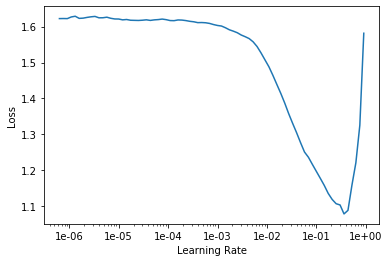

In [83]:
learn.lr_find()
learn.recorder.plot()

In [84]:
learn.fit_one_cycle(4, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,kappa_score,accuracy,time
0,1.614676,1.610845,0.000000,0.290000,00:00
1,1.541788,1.590752,-0.009663,0.285000,00:00
2,1.408892,1.574974,0.177888,0.335000,00:00
3,1.284387,1.567551,0.204488,0.325000,00:00


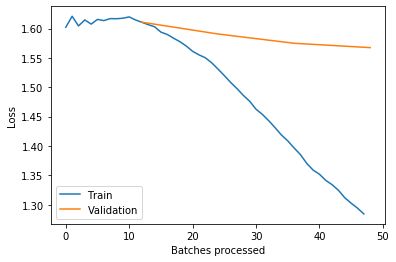

In [85]:
learn.recorder.plot_losses()

In [86]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,kappa_score,accuracy,time
0,1.020562,1.563121,0.202278,0.315000,00:00
1,0.962274,1.550356,0.234029,0.320000,00:00
2,0.877466,1.538277,0.266123,0.330000,00:00
3,0.804205,1.536229,0.247555,0.320000,00:00
4,0.747996,1.536019,0.251782,0.320000,00:00


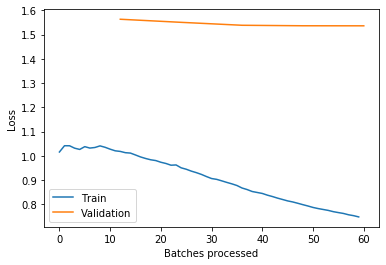

In [87]:
learn.recorder.plot_losses()

In [88]:
test_preds=learn.get_preds(DatasetType.Test)

In [89]:
# small_test_df["AdoptionSpeed"]=np.exp(test_preds[0].data).numpy().T[0]
# small_test_df[["Id","AdoptionSpeed"]]=small_test_df[["Id","AdoptionSpeed"]].astype("int")

In [90]:
# Run all data

idx = np.random.permutation(range(n))[:len(trainCSV)]
idx.sort()

totalSize = len(trainCSV)
totalSize

14993

In [91]:
trainSize=int(totalSize*0.8)
trainSize

11994

In [92]:
testSize = totalSize - trainSize
testSize

2999

In [93]:
trainCSV.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [94]:
# train_df = trainCSV.iloc[idx[:trainSize]].copy()
# valid_df = trainCSV.iloc[idx[trainSize:]].copy()
train_df = trainCSV.copy()

In [95]:
cont_vars = ['Fee', 'Age']
cat_vars =  ['Type', 'Name', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
           'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
           'Sterilized', 'Health', 'Quantity', 'State', 'RescuerID',
           'VideoAmt', 'PetID', 'PhotoAmt']
dep_var = 'AdoptionSpeed'

train_df = train_df[cat_vars + cont_vars + [dep_var]]
#valid_df = valid_df[cat_vars + cont_vars + [dep_var]]

In [96]:
train_df.head()

,Type,Name,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Health,Quantity,State,RescuerID,VideoAmt,PetID,PhotoAmt,Fee,Age,AdoptionSpeed
0,2,Nibble,299,0,1,1,7,0,1,1,...,1,1,41326,8480853f516546f6cf33aa88cd76c379,0,86e1089a3,1.0,100,3,2
1,2,No Name Yet,265,0,1,1,2,0,2,2,...,1,1,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,6296e909a,2.0,0,1,0
2,1,Brisco,307,0,1,2,7,0,2,2,...,1,1,41326,fa90fa5b1ee11c86938398b60abc32cb,0,3422e4906,7.0,0,1,3
3,1,Miko,307,0,2,1,2,0,2,1,...,1,1,41401,9238e4f44c71a75282e62f7136c6b240,0,5842f1ff5,8.0,150,4,2
4,1,Hunter,307,0,1,1,0,0,2,1,...,1,1,41326,95481e953f8aed9ec3d16fc4509537e8,0,850a43f90,3.0,0,1,2


In [97]:
# Transform the categorical variables to that type. Variables in cont_names aren't affected.
procs = [FillMissing, Categorify, Normalize]

In [98]:
#valid = TabularList.from_df(valid_df, path=PATH, cat_names=cat_vars, cont_names=cont_vars)

In [99]:
data = (TabularList.from_df(train_df, path=PATH, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                           .split_by_idx(list(range(trainSize,totalSize)))
                           .label_from_df(cols=dep_var)
                           .databunch())

In [100]:
data.show_batch(rows=10)

Type,Name,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,State,RescuerID,VideoAmt,PetID,PhotoAmt,Fee,Age,target
1,#na#,307,307,3,1,2,7,2,2,2,2,2,1,3,41401,42d8ff353fbe3e1db8ae40b84974d576,0,87ef4d3ca,1.0,-0.2659,-0.5210,1
2,TamTam,276,292,1,1,7,0,3,2,2,1,2,1,1,41326,46c0b9faa6eff3646d7a67e55aa14c52,0,6314ae1c4,5.0,0.3585,-0.3006,3
1,#na#,307,0,2,5,0,0,1,1,2,2,2,1,1,41332,9fc95c2498ef8d6a31664ee13952224b,0,321d04634,3.0,-0.2659,-0.4659,4
1,Harry,103,0,1,1,3,0,3,2,1,1,2,1,1,41401,a7fed5caba65238310d8dc20c4177eb7,0,e95bb9197,2.0,4.1053,2.0693,4
1,Puppy Zorro,307,307,2,1,2,7,2,1,1,1,2,1,1,41401,c00756f2bdd8fa88fc9f07a8309f7d5d,0,c1db71d88,7.0,-0.2659,-0.4659,2
1,Sarsy,307,0,2,1,0,0,2,1,3,3,1,1,1,41326,fa90fa5b1ee11c86938398b60abc32cb,0,7abf263f7,1.0,-0.2659,-0.3557,2
1,Love Puppy 3,307,0,2,1,7,0,2,2,3,3,1,1,1,41401,ee2747ce26468ec44c7194e7d1d9dad9,0,3cc9490b8,3.0,-0.2659,-0.4659,4
1,Zone A2 P9,307,0,1,2,5,0,1,1,1,1,2,1,1,41326,37237ca3633d20c004ec76c0c2ddb4b7,0,206db8d8d,3.0,-0.2659,-0.2455,4
1,Billy,307,0,1,2,7,0,2,2,1,1,2,1,1,41326,fa90fa5b1ee11c86938398b60abc32cb,0,66a287bdf,5.0,-0.2659,-0.5210,3
2,Pets & Strays : Foxy Girl,280,294,2,5,6,7,2,3,3,3,2,1,1,41401,90569c3f7cb0af35cba5dac82c0ac9d7,0,d3ccb2482,1.0,-0.2659,-0.3557,1


In [101]:
kappa = KappaScore()
kappa.weights = "quadratic"

In [102]:
max_log_y = np.log(np.max(train_df['AdoptionSpeed'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [103]:
learn = tabular_learner(data, layers=[200,100], metrics=[kappa, accuracy])
#learn = tabular_learner(data, layers=[2000,1000], ps=[0.001,0.01], emb_drop=0.04, y_range=y_range, metrics=[kappa, accuracy])

In [104]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(7463, 236)
    (2): Embedding(168, 28)
    (3): Embedding(131, 25)
    (4): Embedding(4, 3)
    (5): Embedding(8, 5)
    (6): Embedding(8, 5)
    (7): Embedding(7, 5)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(4, 3)
    (12): Embedding(4, 3)
    (13): Embedding(4, 3)
    (14): Embedding(20, 9)
    (15): Embedding(15, 7)
    (16): Embedding(4832, 185)
    (17): Embedding(10, 6)
    (18): Embedding(11995, 308)
    (19): Embedding(32, 11)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=857, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace)
    (5): BatchNo

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


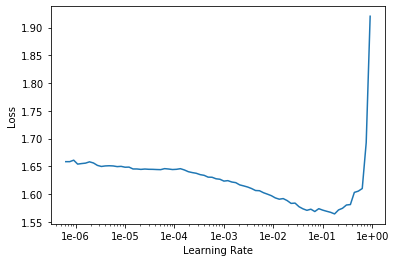

In [105]:
learn.lr_find()
learn.recorder.plot()

In [106]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,kappa_score,accuracy,time
0,1.403402,1.319703,0.346126,0.427476,00:14
1,0.419101,1.410043,0.354881,0.428810,00:12
2,0.134515,1.440017,0.351705,0.430477,00:11


In [107]:
#  epoch 	train_loss 	valid_loss 	kappa_score 	accuracy 	time
# 0 	1.444195 	1.377874 	0.311168 	0.411804 	00:14
# 1 	0.521878 	1.682350 	0.241911 	0.315105 	00:12
# 2 	0.160522 	1.554656 	0.337862 	0.411471 	00:11
# 3 	0.029377 	1.527245 	0.312867 	0.415805 	00:12

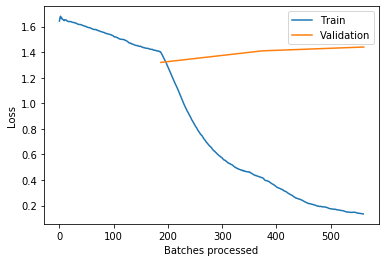

In [108]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


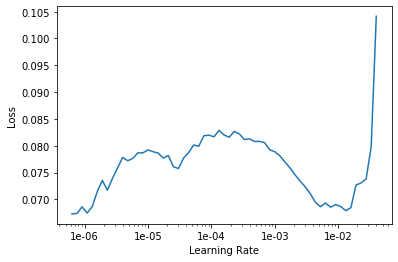

In [109]:
learn.lr_find()
learn.recorder.plot()

In [110]:
learn.fit_one_cycle(3, 1e-5)

epoch,train_loss,valid_loss,kappa_score,accuracy,time
0,0.071723,1.428411,0.354858,0.425809,00:11
1,0.065126,1.429724,0.355817,0.428810,00:11
2,0.059627,1.449633,0.344755,0.424475,00:11
